# 1. CARGAR LIBRERÍAS 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import missingno as msno
import statsmodels.api as sm
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_percentage_error

# 2. CARGAR EL DATAFRAME

## 2.1 CARGAR TODAS LAS COLUMNAS DEL DTAFRAME

In [2]:
df_sin_limpiar = pd.read_csv("C:\\Users\\ingen\\OneDrive\\Escritorio\\CURSO DE DATA SCIENCE\\cathycaz-intro-ml\\data\\raw\\internal-link (2).csv")
# CON ESTE CÓDIGO SE IMPORTA EL DOCUMENTO CON FORMATO CSV
df_sin_limpiar.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 2.2 INFORMACIÓN DEL DTAFRAME

In [3]:
df_sin_limpiar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# 3. CRIBADO MANUAL

## 3.1 OBJETIVO A ESTUDIAR

In [4]:
"""La importante compañía de seguros 4Geeks Insurance S.L. quiere calcular, 
en función de los datos fisiológicos de sus clientes, cuál va a ser la prima (coste) 
que debe asumir cada uno de ellos. Para ello, ha reunido a un equipo completo de médicos 
y en función de datos de otras compañías y un estudio particular han logrado reunir un conjunto 
de datos para entrenar un modelo predictivo."""

'La importante compañía de seguros 4Geeks Insurance S.L. quiere calcular, \nen función de los datos fisiológicos de sus clientes, cuál va a ser la prima (coste) \nque debe asumir cada uno de ellos. Para ello, ha reunido a un equipo completo de médicos \ny en función de datos de otras compañías y un estudio particular han logrado reunir un conjunto \nde datos para entrenar un modelo predictivo.'

## 3.2 CREAR UNA COPIA DEL DATAFRAME ORIGINAL PARA TRABAJAR SOBRE ESTE

In [5]:
df= df_sin_limpiar.copy() 
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 3.3 COMPROBACIÓN DE VALORES ÚNICOS

In [6]:
unicos = df.nunique()
unicos

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

## 3.4 COMPROBACIÓN DE VALORES ÚNICOS IGUAL A 1

In [7]:
df[unicos[unicos==1].index]

""
0
1
2
3
4
...
1333
1334
1335
1336


CONCLUSIÓN: NO HAY VALORES ùNICOS IGUAL A 1

## 3.5 COMPROBACIÓN DE DATOS DUPLICADOS EN FILAS 

In [8]:
df.duplicated().sum()

np.int64(1)

### 3.5.1 VISUALIZAR LAS FILAS DUPLICADAS

In [9]:
# keep=False muestra TODAS las ocurrencias (incluyendo la original)
filas_duplicadas = df[df.duplicated(keep=False)]

if len(filas_duplicadas) > 0:
    print(f"⚠️ Se encontraron {len(filas_duplicadas)} filas duplicadas:")
    print(f"Esto representa {len(filas_duplicadas)/len(df)*100:.2f}% del dataset\n")
    print(filas_duplicadas)
else:
    print("✅ No hay filas duplicadas en el dataset")

⚠️ Se encontraron 2 filas duplicadas:
Esto representa 0.15% del dataset

     age   sex    bmi  children smoker     region    charges
195   19  male  30.59         0     no  northwest  1639.5631
581   19  male  30.59         0     no  northwest  1639.5631


## 3.6 ELIMINAR DATOS DUPLICADOS EN FILAS

In [10]:
df.drop_duplicates(keep='first', inplace=True)
df.duplicated().sum()

np.int64(0)

CONCLUSIÓN: YA NO TENEMOS DATOS DUPLICADOS EN FILAS

## 3.7 COMPROBACIÓN DE DATOS DUPLICADOS EN COLUMNAS 

In [11]:
df.T.duplicated().sum()

np.int64(0)

CONCLUSIÓN: NO HAY DATOS DUPLICADOS EN COLUMNAS

## 3.8 VERIFICACIÓN DE DATOS FALTANTES EN COLUMNAS

In [12]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [13]:
df.isnull().mean()*100

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

## 3.9 ESTUDIAMOS A FONDO SI REALMENTE NO HAY DATOS FALTANTES!!

### 3.9.1 VISUALIZAR COLUMNAS CON VALORES DE TIPO OBJECT

In [14]:
df.select_dtypes(include='object')

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


### 3.9.2 ANÁLISIS DETALLADO DE CADA COLUMNA DE TEXTO PARA ENCONTRAR POSIBLES VALORES ENMASCARADOS

In [15]:
# Ahora vamos a ver que valores únicos tiene cada columna de texto. Esto nos ayudará a identificar valores sospechosos.
for columna in df.select_dtypes(include='object').columns: # → Recorre todas las columnas de texto
    print(f"\n{'-'*25}")
    print(f"COLUMNA: {columna}")
    print(f"{'-'*25}")
    print(df[columna].value_counts()) # Muestra cada valor único y cuántas veces aparece, ordenado de mayor a menor frecuencia
    print(f"\nTotal de valores únicos: {df[columna].nunique()}") # → Cuenta cuántos valores diferentes hay en total


-------------------------
COLUMNA: sex
-------------------------
sex
male      675
female    662
Name: count, dtype: int64

Total de valores únicos: 2

-------------------------
COLUMNA: smoker
-------------------------
smoker
no     1063
yes     274
Name: count, dtype: int64

Total de valores únicos: 2

-------------------------
COLUMNA: region
-------------------------
region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

Total de valores únicos: 4


CONCLUSIÓN: NO HAY VALORES FALTANTES ENMASCARADOS

## 3.10 GRÁFICA DE VALORES FALTANTES 

<Axes: >

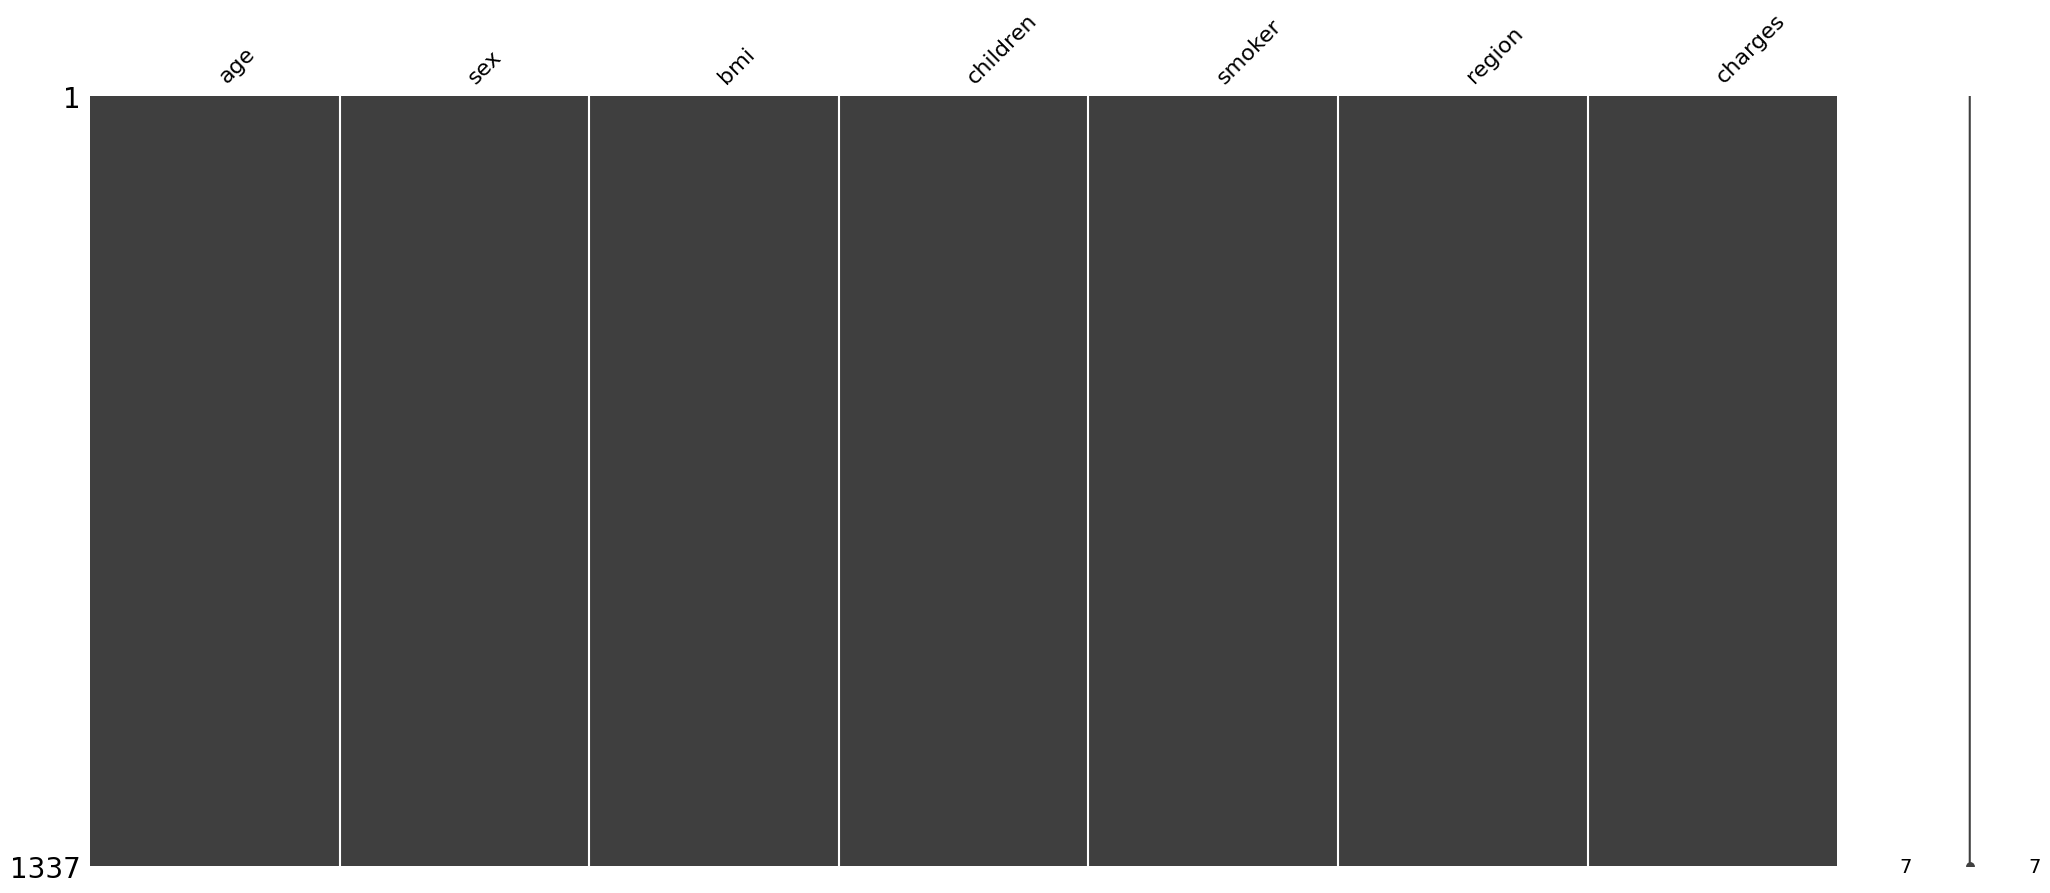

In [16]:
msno.matrix(df)

## 3.11 VERIFICAR DATOS FALTANTES EN FILAS MAYORES AL 40% 

In [17]:
df_filas_faltantes = (df.T.isnull().sum()* 100 / len(df)).round(2)
df_filas_faltantes.sum()

np.float64(0.0)

CONCLUSIÓN: (EN ESTE CASO NO APLICA) POR LÓGICA NO HAY FILAS FALTANTES CON DATOS MAYORES A 40%

# 4. CATEGORIZACIÓN DE VARIABLES 

## 4.1 APLICAMOS EL MÉTODO 'One-Hot Encoding' 

In [18]:
columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
df_dummies = pd.get_dummies(df[columns], drop_first=True, dtype=int)
num_cols = df.select_dtypes(exclude=['object', 'category'])
df= pd.concat([df_dummies,num_cols],axis=1)

In [19]:
df.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age,bmi,children,charges
0,0,1,0,0,1,19,27.900,0,16884.92400
1,1,0,0,1,0,18,33.770,1,1725.55230
2,1,0,0,1,0,28,33.000,3,4449.46200
3,1,0,1,0,0,33,22.705,0,21984.47061
4,1,0,1,0,0,32,28.880,0,3866.85520


# 5. VERIFICAR SI EL MODELO SIGUE UNA REGRESION LINEAL 

## 5.1 GRÁFICA LINEAL 

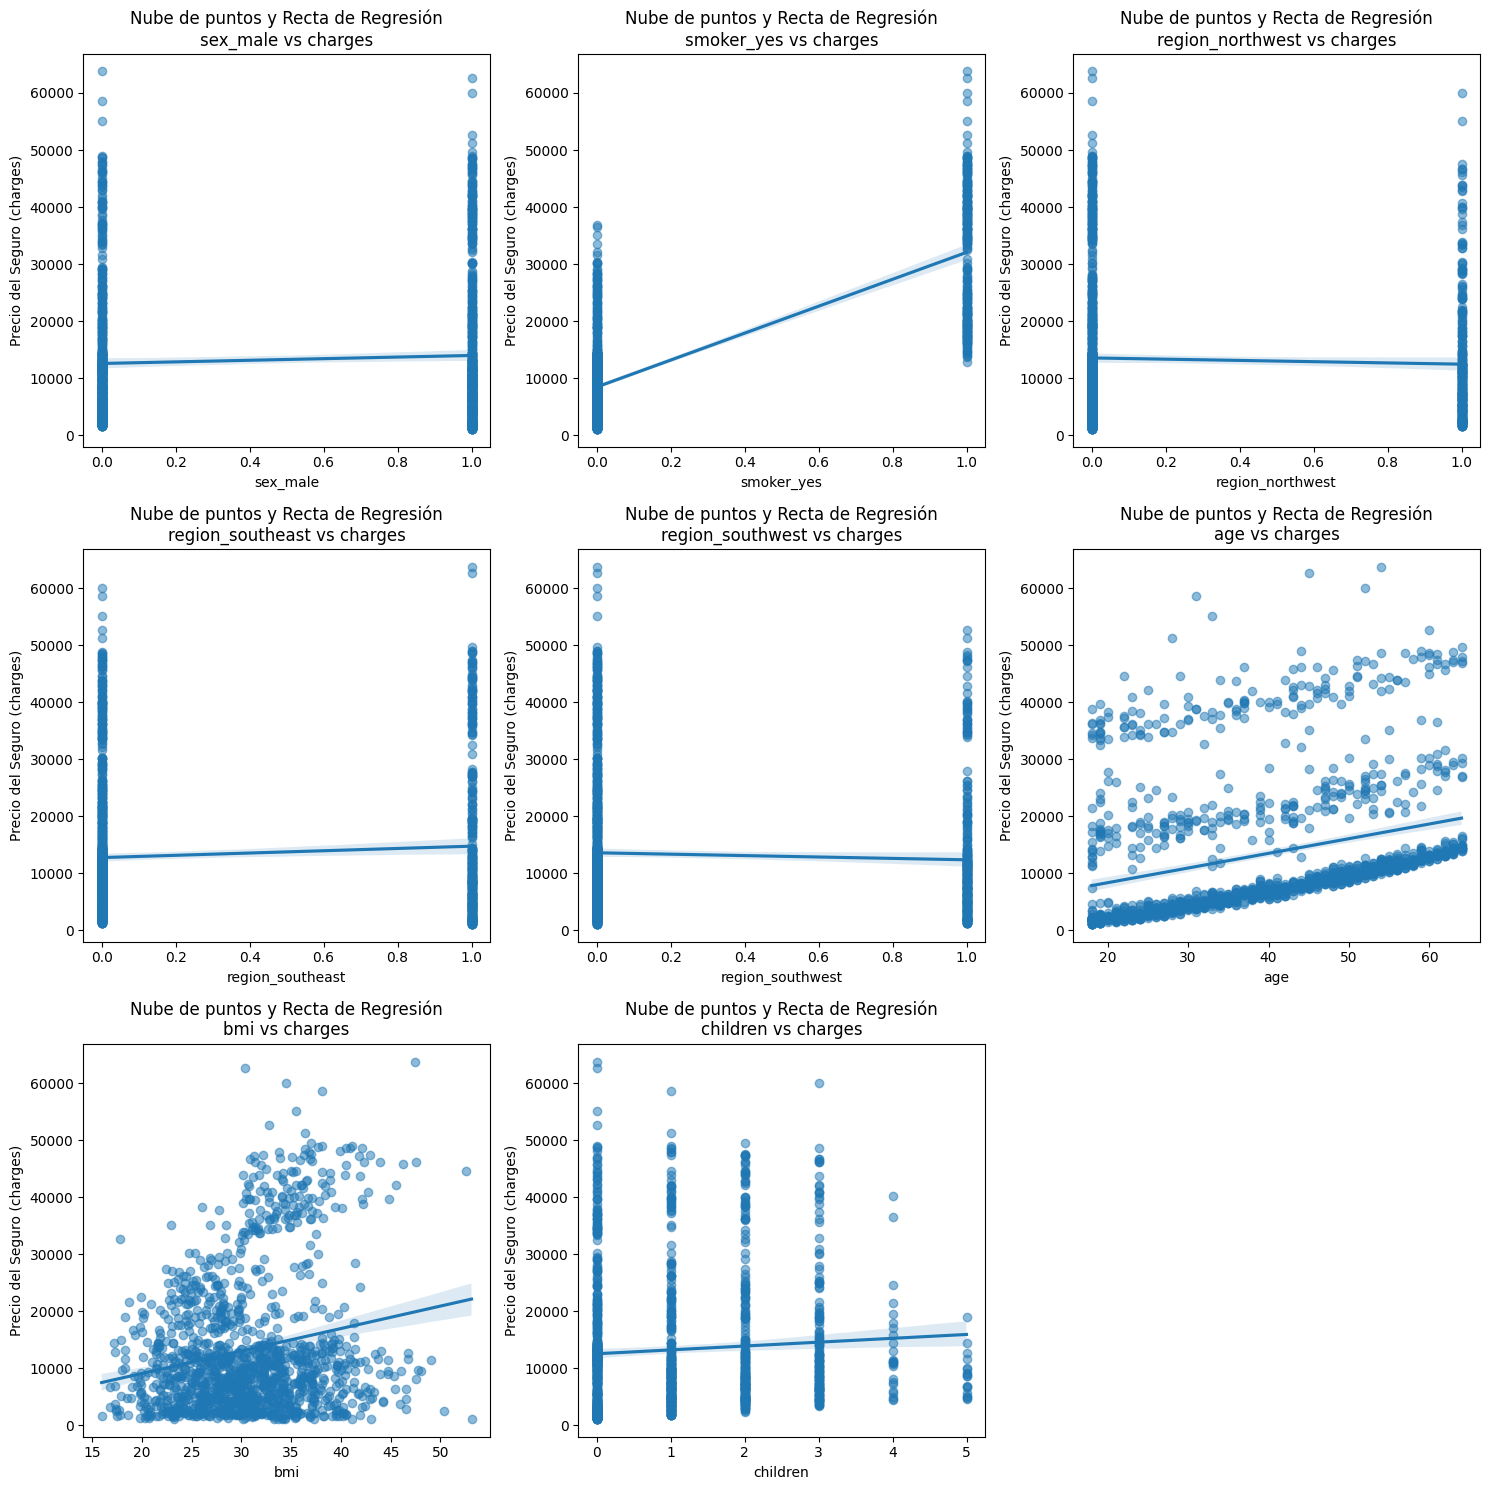

In [20]:
# Ver todas las relaciones a la vez con línea de regresión
columnas_numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remover 'charges' de la lista si está presente
columnas_para_graficar = [col for col in columnas_numericas if col != 'charges']

# Calcular el número de filas y columnas necesarias
num_graficos = len(columnas_para_graficar)
num_cols = 3  # 3 gráficos por fila
num_rows = (num_graficos + num_cols - 1) // num_cols  # Redondear hacia arriba

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for i, col in enumerate(columnas_para_graficar):
    # Usar regplot de seaborn para mostrar nube de puntos + línea de regresión
    sns.regplot(x=col, y='charges', data=df, ax=axes[i], scatter_kws={'alpha':0.5})
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Precio del Seguro (charges)')
    axes[i].set_title(f'Nube de puntos y Recta de Regresión\n{col} vs charges')

# Ocultar subplots vacíos si los hay
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

## 5.2 DETECTAR VALORES ATIPICOS OUTLIERS

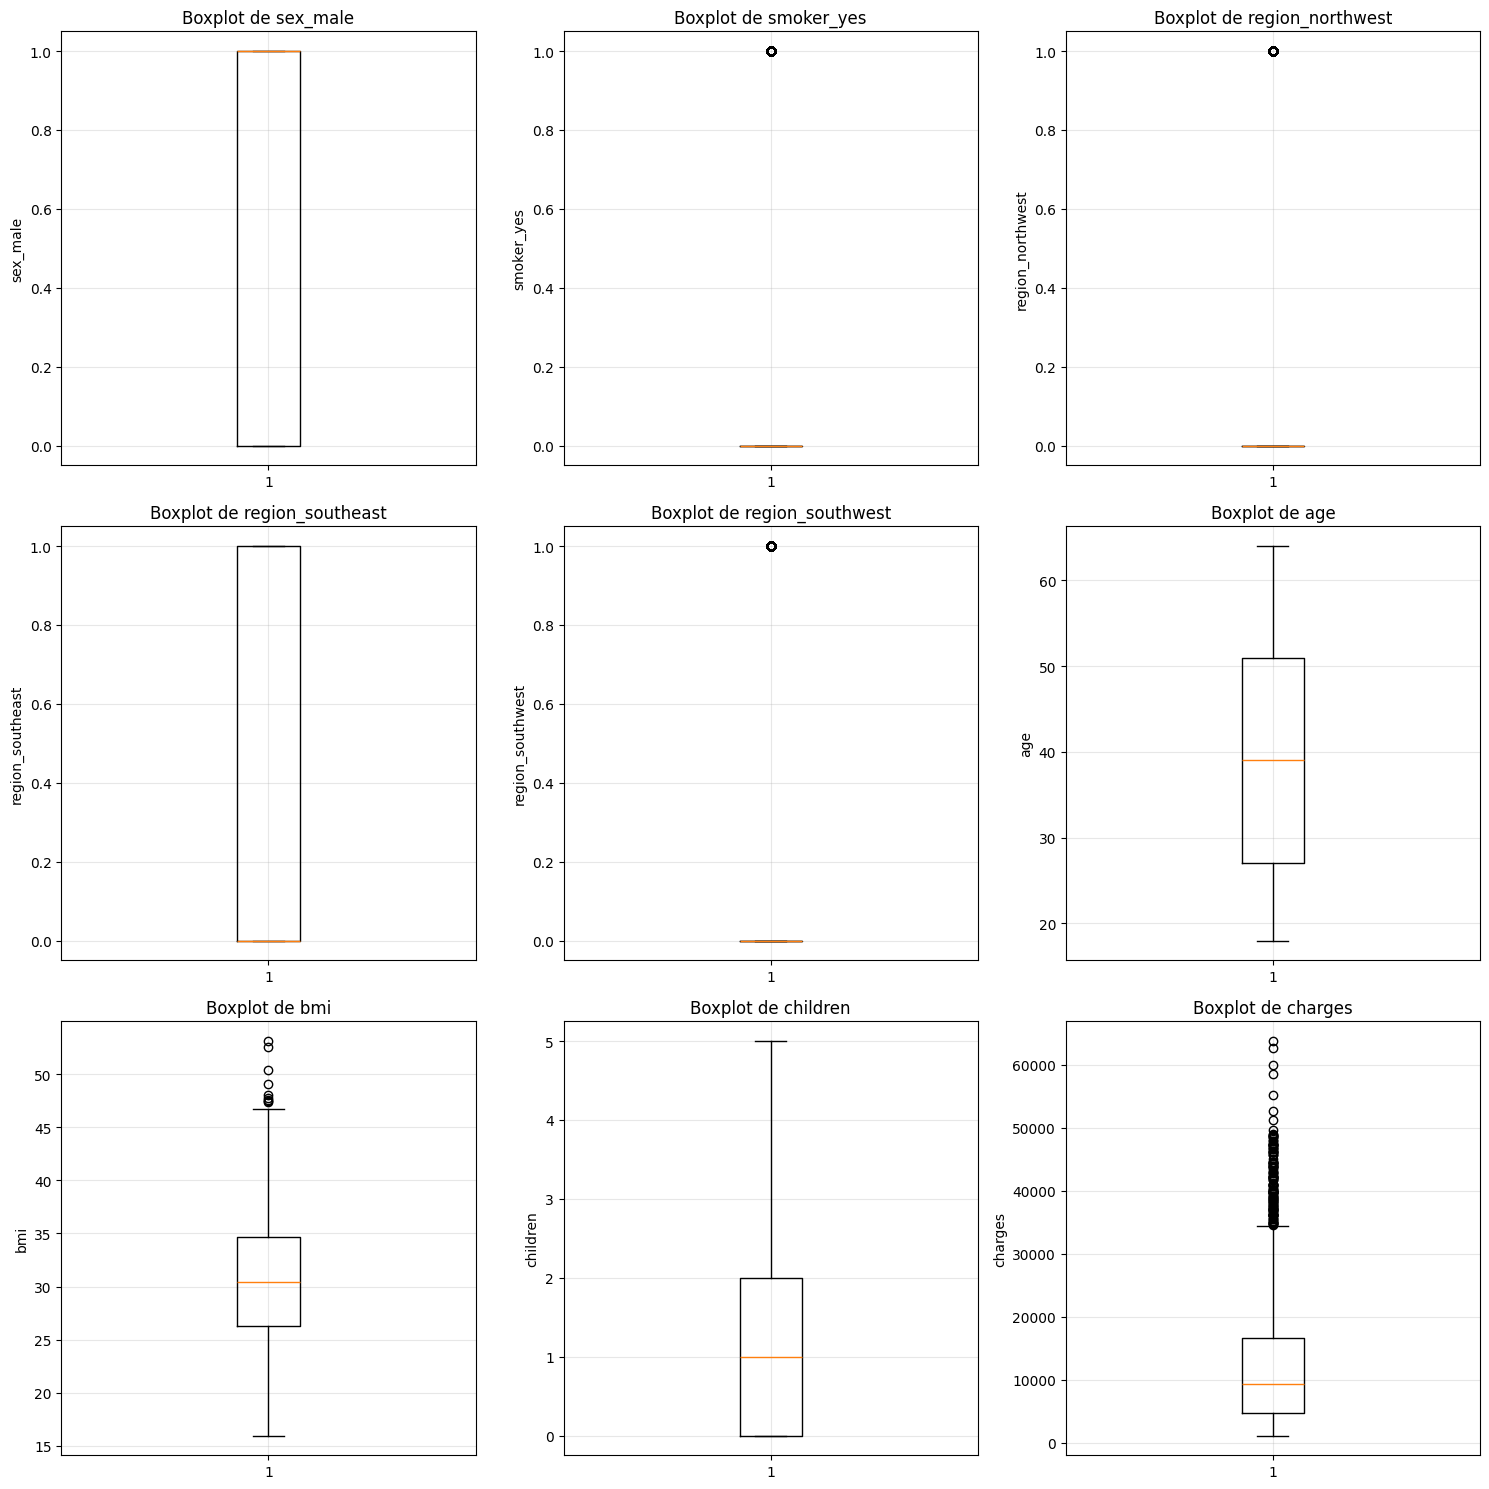


📊 Se analizaron 9 columnas numéricas: sex_male, smoker_yes, region_northwest, region_southeast, region_southwest, age, bmi, children, charges


In [21]:
# Ver outliers en TODAS las columnas numéricas automáticamente
columnas_numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Calcular cuántos gráficos necesitamos
num_columnas_grafico = len(columnas_numericas)
num_cols = 3  # 3 boxplots por fila
num_rows = (num_columnas_grafico + num_cols - 1) // num_cols

# Crear los subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()

# Crear un boxplot para cada columna
for i, col in enumerate(columnas_numericas):
    axes[i].boxplot(df[col])
    axes[i].set_title(f'Boxplot de {col}')
    axes[i].set_ylabel(col)
    axes[i].grid(True, alpha=0.3)

# Ocultar subplots vacíos si los hay
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

print(f"\n📊 Se analizaron {num_columnas_grafico} columnas numéricas: {', '.join(columnas_numericas)}")

# 6. APLICAR EL TRAIN TEST SPLIT 

## 6.1 SEPARAR LA VARIABLE OBJETIVO DEL DATAFRAME

In [22]:
X = df.drop('charges', axis=1)  # Características: todas las columnas excepto 'charges'
y = df['charges']  # Variable objetivo: la prima que queremos predecir

## 6.2 SEPARAR EL DATAFRAME EN ENTRENAMIENTO (80%) Y PRUEBA (20%)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Mostrar las dimensiones de los conjuntos resultantes

## 7.1 COMPROBAR SI PUEDO APLICAR EL MÉTODO DE REGRESIÓN LINEAL

In [24]:
X = sm.add_constant(X)
model = sm.OLS(y, X)

# Aprenda de los datos fit
results = model.fit()

In [25]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.0
Date:                Fri, 21 Nov 2025   Prob (F-statistic):               0.00
Time:                        13:31:39   Log-Likelihood:                -13538.
No. Observations:                1337   AIC:                         2.709e+04
Df Residuals:                    1328   BIC:                         2.714e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.194e+04    988.227  

CONCLUSIÓN: SI PUEDO APLICAR EL MÉTODO DE REGRESIÓN LINEAL, YA QUE R2 QUE EL MODELO EXPLICA EL 75 % DE LA VARIABILIDAD EN CHARGES Y R AJUSTADO POR EL NÚMERO DE VARIABLES ES MUY CERCANO AL R2

## 7.2 GRÁFICAR RESIDUOS 

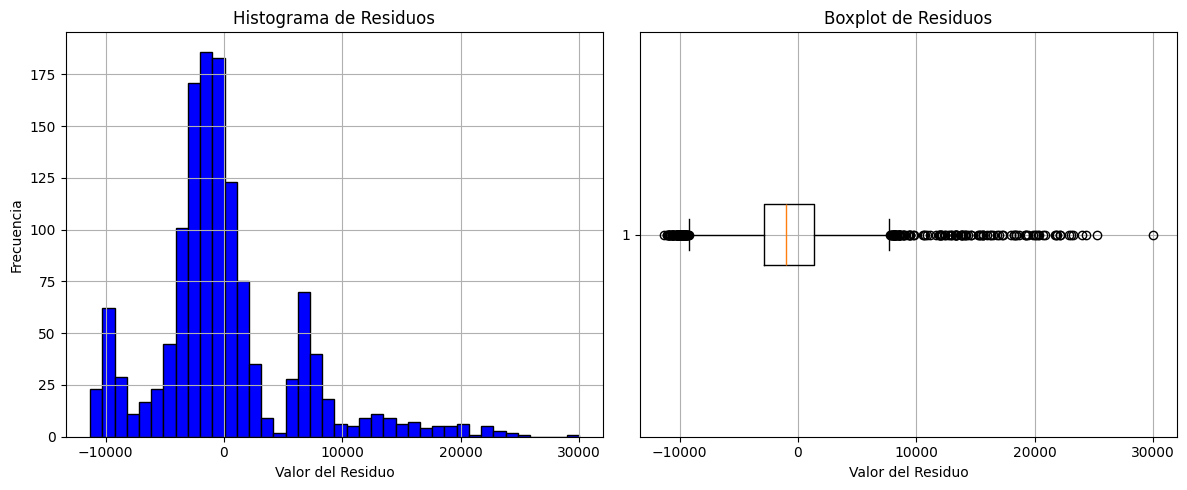

In [26]:
residuos = results.resid

# Crea una figura con dos subgráficos (uno para el histograma y otro para el boxplot)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Histograma de los residuos en el primer subgráfico (ax1)
ax1.hist(residuos, bins=40, color='blue', edgecolor='black')
ax1.set_title('Histograma de Residuos')
ax1.set_xlabel('Valor del Residuo')
ax1.set_ylabel('Frecuencia')
ax1.grid(True)

# Boxplot de los residuos en el segundo subgráfico (ax2)
ax2.boxplot(residuos, vert=False)
ax2.set_title('Boxplot de Residuos')
ax2.set_xlabel('Valor del Residuo')
ax2.grid(True)

# Muestra la figura con ambos gráficos
plt.tight_layout()  # Ajusta los márgenes para evitar superposiciones
plt.show()

In [23]:
print(f"Conjunto de entrenamiento - X: {X_train.shape}, y: {y_train.shape}")
print(f"Conjunto de prueba - X: {X_test.shape}, y: {y_test.shape}")

Conjunto de entrenamiento - X: (1069, 8), y: (1069,)
Conjunto de prueba - X: (268, 8), y: (268,)


# 7. APLICAR EL MODELO DE REGRESIÓN LINEAL

## 7.1 VERIFICAR SI EL MÉTODO SIGUE UNA REGRESIÓN LINEAL

In [27]:
X = sm.add_constant(X)
model = sm.OLS(y, X)

# Aprenda de los datos fit
results = model.fit()

In [28]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.0
Date:                Fri, 21 Nov 2025   Prob (F-statistic):               0.00
Time:                        13:37:09   Log-Likelihood:                -13538.
No. Observations:                1337   AIC:                         2.709e+04
Df Residuals:                    1328   BIC:                         2.714e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.194e+04    988.227  

## 7.2 GRÁFICO DE RESIDUOS

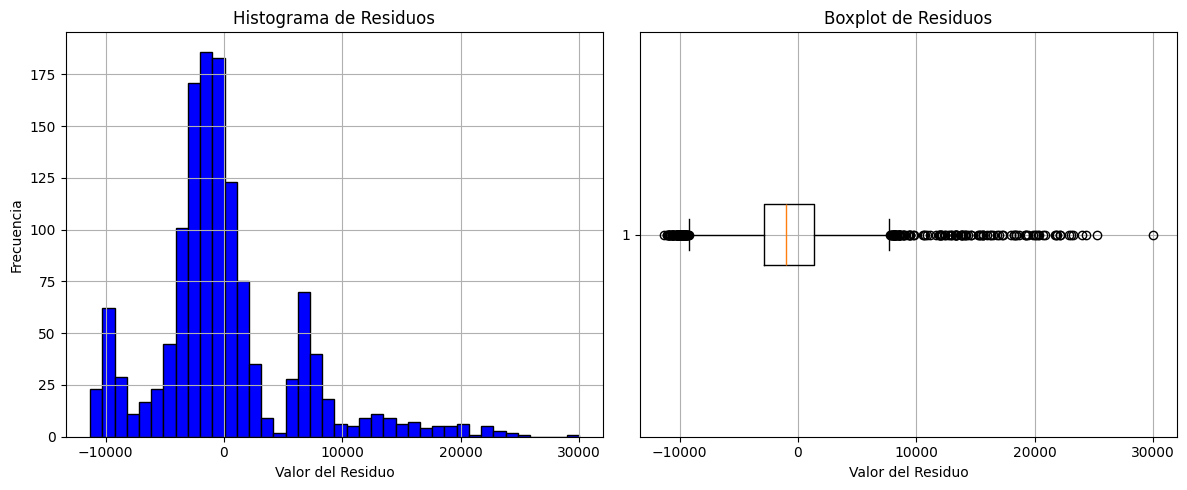

In [29]:
# Crea una figura con dos subgráficos (uno para el histograma y otro para el boxplot)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Histograma de los residuos en el primer subgráfico (ax1)
ax1.hist(residuos, bins=40, color='blue', edgecolor='black')
ax1.set_title('Histograma de Residuos')
ax1.set_xlabel('Valor del Residuo')
ax1.set_ylabel('Frecuencia')
ax1.grid(True)

# Boxplot de los residuos en el segundo subgráfico (ax2)
ax2.boxplot(residuos, vert=False)
ax2.set_title('Boxplot de Residuos')
ax2.set_xlabel('Valor del Residuo')
ax2.grid(True)

# Muestra la figura con ambos gráficos
plt.tight_layout()  # Ajusta los márgenes para evitar superposiciones
plt.show()

## 7.3 ENTRENAMOS EL MODELO

In [30]:
# Entrenamos un modelo de regresión lineal sin regularización
m_linear = LinearRegression().fit(X_train, y_train)

# Realizamos predicciones sobre el conjunto de entrenamiento y de testeo
yhat_train_linear = m_linear.predict(X_train)
yhat_linear = m_linear.predict(X_test)

## 7.4 VISUALIZAMOS PREDICCIONES 

In [31]:
print(yhat_train_linear[0:6])
print(yhat_linear[0:6])

[ 2326.02453297  3289.2193497  14447.83525029 16820.71016479
 10116.72986155 10413.54442316]
[ 8143.69388412  5737.11568259 14369.31487618 31745.51363586
  8962.38665706 13149.72235307]


## 7.5 RELIZAMOS MÉTRICAS

In [32]:
def get_metrics(yhat, y_test, yhat_train, y_train):
  metrics_train = r2_score(y_train, yhat_train), median_absolute_error(y_train, yhat_train), mean_absolute_percentage_error(y_train, yhat_train)*100
  metrics_test = r2_score(y_test, yhat), median_absolute_error(y_test, yhat), mean_absolute_percentage_error(y_test, yhat)*100
  metrics_diff = list(map(lambda x: x[1]-x[0], zip(metrics_train, metrics_test)))
  return pd.DataFrame(data=[metrics_train, metrics_test, metrics_diff], columns=['R2', 'Median AE', 'MAPE'], index=['Train set', 'Test set', 'Diferencia'])

In [33]:
get_metrics(yhat_linear, y_test, yhat_train_linear, y_train)

,R2,Median AE,MAPE
Train set,0.729906,2436.996366,41.920915
Test set,0.806929,2666.194376,41.396756
Diferencia,0.077023,229.198011,-0.524158


# 8. VISUALIZACIÓN DEL MODELO

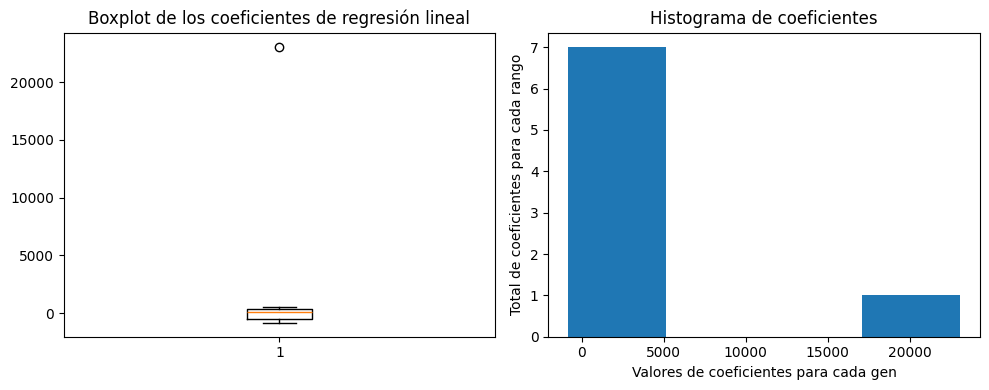

In [35]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.boxplot(m_linear.coef_)
plt.title('Boxplot de los coeficientes de regresión lineal')
plt.subplot(1, 2, 2)
plt.hist(m_linear.coef_,'sturges')
plt.xlabel('Valores de coeficientes para cada gen')
plt.ylabel('Total de coeficientes para cada rango')
plt.title('Histograma de coeficientes')
plt.tight_layout()
plt.show()

CONCLUSIÓN: EL MODELO ES CORRECTO!!